#### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense,Dropout, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
import os
import cv2
from tensorflow.keras.preprocessing import image

In [2]:
pet = pd.read_csv(r"E:\Data Science\Project\petfinder\train.csv")
pet.head()

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
pet.shape

(9912, 14)

In [4]:
pet.Pawpularity.unique()

array([ 63,  42,  28,  15,  72,  74,  22,  35,  53,  21,   2,  18,  41,
        13,  98,  34,  69, 100,  29,  27,  50,  36,  52,  40,  31,  67,
        54,  30,  68,  24,  47,  16,  95,  37,  46,  62,  25,  23,  33,
        32,  17,  82,  55,  58,  19,  26,  39,  57,  38,  51,  60,  49,
        14,  75,  43,  88,  94,  91,   4,  45,   3,  89,  48,  12,  20,
        61,  71,  97,   7,  79,  11,  56,  10,  65,   8,   5,  80,  59,
         9,  87,  44,  92,   6,  73,  64,  96,  83,  77,  93,  78,  84,
        70,  81,  66,  76,  90,  85,  86,   1,  99], dtype=int64)

In [5]:
len(pet.Pawpularity.unique())

100

### Importing images matching with the name and its Pawpularity score

In [6]:
image_size = 200 
input_image = []    
folders = r'E:\Data Science\Project\petfinder\train'
i = 0
for i in range(0,pet.shape[0]):
    image_path  = os.path.join(folders , pet['Id'][i]+'.jpg')
    image_array =  cv2.imread(image_path) 
    image_array =cv2.resize(image_array , (image_size  , image_size) ) 
    input_image.append([image_array , pet['Pawpularity'][i]])# image
    if i==500:
        break


In [7]:
x = []
y = []
for i,j in input_image:
    x.append(i)
    y.append(j)

#### Sampling

In [8]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [9]:
train_x= np.array(train_x)
test_x= np.array(test_x)
train_y = np.array(train_y)

In [10]:
train_x.shape

(400, 200, 200, 3)

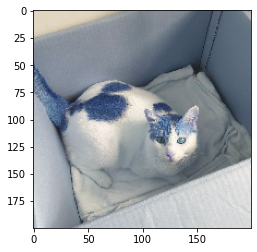

In [11]:
plt.imshow(train_x[7])

#### normalization

In [12]:
train_x = train_x/255

In [13]:
test_x = test_x/255

In [14]:
train_x.shape

(400, 200, 200, 3)

In [15]:
train_x.shape[1:]

(200, 200, 3)

#### now lets create an architecture

In [23]:
model = Sequential()
model.add(Conv2D(filters = 32 , kernel_size =(3,3) , activation ='relu'  , input_shape = train_x.shape[1:]  ))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Flatten())

model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(1 , activation= 'linear')) 
model.compile(optimizer='adam', loss = 'mean_squared_error' , metrics = ['mse'])

In [24]:
model.fit(train_x , train_y ,epochs = 10 )

Epoch 1/10
13/13 [==============================] - 10s 648ms/step - loss: 886.2512 - mse: 886.2512
Epoch 2/10
13/13 [==============================] - 8s 596ms/step - loss: 541.1558 - mse: 541.1558
Epoch 3/10
13/13 [==============================] - 8s 587ms/step - loss: 543.6939 - mse: 543.6939
Epoch 4/10
13/13 [==============================] - 8s 596ms/step - loss: 492.5937 - mse: 492.5937
Epoch 5/10
13/13 [==============================] - 8s 582ms/step - loss: 480.7471 - mse: 480.7471
Epoch 6/10
13/13 [==============================] - 8s 588ms/step - loss: 404.9454 - mse: 404.9454
Epoch 7/10
13/13 [==============================] - 8s 590ms/step - loss: 383.3375 - mse: 383.3375
Epoch 8/10
13/13 [==============================] - 8s 592ms/step - loss: 339.4019 - mse: 339.4019
Epoch 9/10
13/13 [==============================] - 8s 596ms/step - loss: 323.9749 - mse: 323.9749
Epoch 10/10
13/13 [==============================] - 8s 592ms/step - loss: 291.5997 - mse: 291.5997


In [25]:
pred = model.predict(test_x)

4/4 [==============================] - 1s 120ms/step


In [26]:
pred_classes = np.squeeze(pred, axis = 1)

In [27]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [28]:
mean_absolute_percentage_error(test_y, pred_classes)

0.49989783567484625

In [29]:
rmse = np.sqrt(mean_squared_error(test_y, pred_classes))
rmse

21.26838567194722